<a href="https://colab.research.google.com/github/tamucc-gcl/wrkshp_edna_metabarcoding/blob/main/analysis/colab_renv_setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R in Colab with renv Persisted on Google Drive

This notebook will:
1. Mount Google Drive and clone your GitHub project.
2. Restore your `renv` environment into a Drive-backed library so package installs persist across Colab sessions.
3. Run example R code to verify setup.


In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.environ['COLAB'] = 'TRUE'

%reload_ext rpy2.ipython

Mounted at /content/drive


Creating a GitHub PAT Token: (Only needed while repo is private)

1. In a seperate window navigate to the github setting (click profile picture in top right corner then click settings with the gear icon)
2. Scroll all the way down to "Developer settings" in the left hand menu
3. Click "Personal access tokens" dropdown and select the "Fine-grained tokens" option
4. Click "Generate new token" (top middle-right)
5. Name the token something meaningful.
6. Select 'tamucc-gcl' under the "Resource owner" dropdown.
7. Select "Only select repositories" and select "wrkshp_edna_metabarcoding" from the dropdown
8. Expand the "Repository permissions" menu
9. Change 'Contents" to "Read-only"
10. Click "Generate token"
11. Copy token to clipboard
12. Run below code block and paste token when requested


In [2]:
from getpass import getpass
import os

# ask you (securely) for your PAT
token = getpass("GitHub PAT: ")

# build the clone URL
local_path = '/content/edna_workshop'
repo  = "tamucc-gcl/wrkshp_edna_metabarcoding"
url   = f"https://{token}@github.com/{repo}.git"

# clone into /content
!git clone {url} {local_path}

# (optionally) remove token from memory
del token

print("Repo is at:", local_path)

GitHub PAT: ··········
Cloning into '/content/edna_workshop'...
remote: Enumerating objects: 211, done.
remote: Counting objects: 100% (211/211), done.
remote: Compressing objects: 100% (177/177), done.
remote: Total 211 (delta 66), reused 158 (delta 26), pack-reused 0 (from 0)
Receiving objects: 100% (211/211), 15.82 MiB | 18.78 MiB/s, done.
Resolving deltas: 100% (66/66), done.
Repo is at: /content/edna_workshop


In [3]:
%%R
# 1️⃣ Point R at your Drive-backed library
drive_lib <- "/content/drive/MyDrive/edna_libraries"
dir.create(drive_lib, recursive = TRUE, showWarnings = FALSE)
.libPaths(c(drive_lib, .libPaths()))
setwd('/content/edna_workshop')


[1] "/content/drive/MyDrive/edna_libraries"
[2] "/usr/local/lib/R/site-library"        
[3] "/usr/lib/R/site-library"              
[4] "/usr/lib/R/library"                   


In [4]:
%%R
if (!requireNamespace("renv", quietly = TRUE)) {
  install.packages("renv", lib = drive_lib)
}
renv::restore(prompt = FALSE)

Run 0 stress 0.1192678 
Run 1 stress 0.1192678 
... Procrustes: rmse 1.487973e-05  max resid 4.535196e-05 
... Similar to previous best
Run 2 stress 0.1192678 
... Procrustes: rmse 2.354209e-06  max resid 4.467607e-06 
... Similar to previous best
Run 3 stress 0.1183186 
... New best solution
... Procrustes: rmse 0.02027188  max resid 0.06496894 
Run 4 stress 0.1183186 
... New best solution
... Procrustes: rmse 1.832268e-05  max resid 5.580524e-05 
... Similar to previous best
Run 5 stress 0.1192678 
Run 6 stress 0.1183186 
... New best solution
... Procrustes: rmse 3.346462e-06  max resid 1.130241e-05 
... Similar to previous best
Run 7 stress 0.1192678 
Run 8 stress 0.1192679 
Run 9 stress 0.1183186 
... Procrustes: rmse 5.021523e-06  max resid 1.281926e-05 
... Similar to previous best
Run 10 stress 0.1183186 
... Procrustes: rmse 5.692478e-06  max resid 1.733563e-05 
... Similar to previous best
Run 11 stress 0.1183186 
... Procrustes: rmse 4.56624e-06  max resid 1.481569e-05 
...

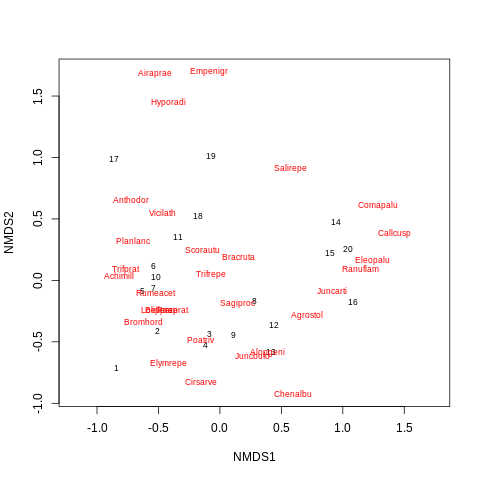

In [10]:
%%R
library(vegan)
data(dune)
sol <- metaMDS(dune)
sol
plot(sol, type="t")

Below is extra troubleshooting code

In [ ]:
drive.flush_and_unmount()

In [ ]:
import shutil
shutil.rmtree('/content/edna_workshop')


OSError: [Errno 107] Transport endpoint is not connected: '/content/edna_workshop'